In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import sklearn
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn import ensemble
from sklearn.model_selection import train_test_split
#%matplotlib inline

In [2]:
## To load  dataset
df= pd.read_csv('train.csv')

In [3]:
#To convert date from string
df['date']=pd.to_datetime(df['datetime'])

In [4]:
## Extract month, hour and day of the week
df.set_index('date', inplace=True)
df['month']=df.index.month
df['hours']=df.index.hour
df['dayOfWeek']=df.index.weekday

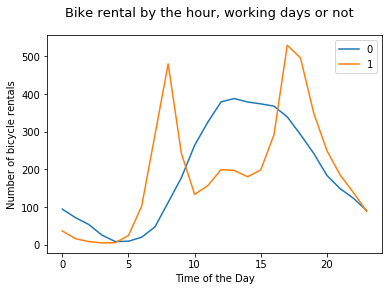

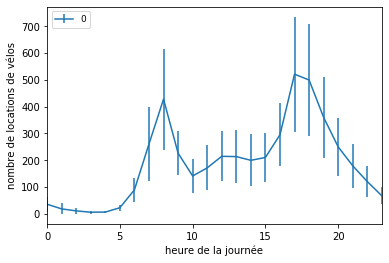

In [5]:
#Influence of time

## Class to plot the average number of rentals bikes hour by hour for weekday and weekend


class mean_30():
    def __init__(self, df):
        self.df=df
    def mean_hours_min(self,h):
        a = self.df["hours"] == h
        return self.df[a]["count"].mean() 
    def transf(self, t):
        return self.mean_hours_min(t)
    def transfc(self, t):
        return self.err_hours_min(t)
    def vector_day(self):
        k = []
        for i in range(0,24):
            k.append(i)
        hour_day = pd.DataFrame()
        hour_day["A"] = k
        return hour_day["A"] 
    def view(self):
        plt.plot(self.vector_day().apply(self.transf))

#Plot 

fig=plt.figure()
fig.suptitle('Bike rental by the hour, working days or not', fontsize=13)
plt.ylabel('Number of bicycle rentals')
plt.xlabel('Time of the Day')
moy0=mean_30(df[df['workingday']==0])
moy0.view()
moy1=mean_30(df[df['workingday']==1])
moy1.view()
plt.legend(['0','1'])
plt.show()

#class to plot the standard deviation of the number of bicycle rentals hour by hour for a day


j=0

class std_30():
    def __init__(self, df):
        self.df=df
    def mean_hours_std(self,j,h):
        y = self.df[self.df["dayOfWeek"]==j]["hours"] == h
        return self.df[self.df["dayOfWeek"]==j][y]["count"].mean()
    def err_hours(self,j,h):
        y = self.df[self.df["dayOfWeek"]==j]["hours"] == h
        return self.df[self.df["dayOfWeek"]==j][y]["count"].std()
    def transf_err(self,t):
        return self.mean_hours_std(j,t)
    def transf_err2(self,t):
        return self.err_hours(j,t)
    def vector_day(self):
        k = []
        for i in range(0,24):
            k.append(i)
        hour_std = pd.DataFrame()
        hour_std["A"] = k
        return hour_std["A"] 
    def view(self):
        errors=self.vector_day().apply(self.transf_err2)
        fig, ax = plt.subplots()
        self.vector_day().apply(self.transf_err).plot(yerr=errors, ax=ax,label=str(j))
        plt.legend('0',loc=2,prop={'size':9})
#plot
fig.suptitle('Deviation standard des locations de velo selon l\'heure', fontsize=13)
std0=std_30(df)
std0.view()
plt.ylabel('nombre de locations de vélos')
plt.xlabel('heure de la journée')
plt.show()



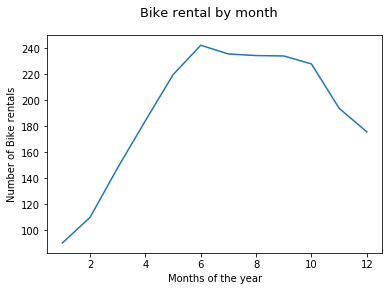

In [6]:
#Influence of Month

## class to plot the average number of rentals of bikes per month

class month_30():
    def __init__(self, df):
        self.df=df
    def mean_hours_min(self,m):
        a = self.df["month"] == m
        return self.df[a]["count"].mean() 
    def transf(self, t):
        return self.mean_hours_min(t)
    def transfc(self, t):
        return self.err_hours_min(t)
    def vector_day(self):
        k = []
        for i in range(0,13):
            k.append(i)
        hour_day = pd.DataFrame()
        hour_day["A"] = k
        return hour_day["A"] 
    def view(self):
        plt.plot(self.vector_day().apply(self.transf))

## plot

fig=plt.figure()
fig.suptitle('Bike rental by month', fontsize=13)
moy0=month_30(df)
moy0.view()
plt.ylabel('Number of Bike rentals')
plt.xlabel('Months of the year')
plt.show()


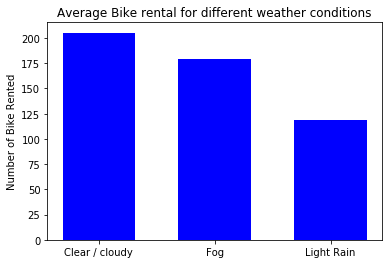

In [9]:
#Influence of Weather
plt.figure()

# Average demand for bikes for the diffferent weather conditions 

a={u'Clear / cloudy':df[df['weather']==1]['count'].mean(), 
     u'Fog': df[df['weather']==2]['count'].mean(), 
     u'Light Rain':df[df['weather']==3]['count'].mean()
    }

width = 1/1.6
plt.bar(range(len(a)), a.values(),width,color="blue",align='center')
plt.xticks(range(len(a)), a.keys())
plt.ylabel('Number of Bike Rented')
plt.title('Average Bike rental for different weather conditions')
plt.show()


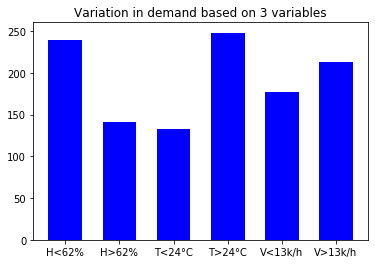

In [8]:
# Influence of wind, temperature and humidity


#Average demand for bikes for certain parameters like speed of wind, temperature and humidity

D = {u'V>13k/h':df[df['windspeed']>13]['count'].mean(), 
     u'V<13k/h': df[df['windspeed']<13]['count'].mean(), 
     u'T<24°C':df[df['atemp']<24]['count'].mean(), 
     u'T>24°C':df[df['atemp']>24]['count'].mean(), 
     u'H>62%': df[df['humidity']>62]['count'].mean(), 
     u'H<62%':df[df['humidity']<62]['count'].mean()
    }
od = collections.OrderedDict(sorted(D.items()))
width = 1/1.6
plt.figure()
plt.bar(range(len(od)), od.values(),width,color="blue",align='center')
plt.xticks(range(len(od)), od.keys())
plt.title('Variation in demand based on 3 variables')
plt.ylabel('Number of Bike Rented')
plt.show()


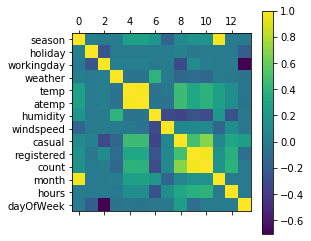

In [33]:
#conclusion and choice of influencing parameters

#To calculate correlation matrix to remove correlated variables

df.corr()
plt.matshow(df.corr())
plt.yticks(range(len(df.corr().columns)), df.corr().columns); 
plt.colorbar()
plt.show()

df1=df.drop(['workingday','datetime','season','atemp','holiday','registered','casual'],axis=1)

target=df1['count'].values #set of outputs to predict (yi)

train=df1.drop('count',axis=1) #dataset (xi)

## Random split between training and test data
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    train, target, test_size=0.33, random_state=42)

## Creation of a class to plot learning curves

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = sklearn.model_selection.learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

Linear Regression Training Score   :  0.33714622910676395
Linear Regression Test Score  :  0.33352764224301534
Linear Regression Co-efficient :
[['Setting', 'Coefficient'], ['weather', -0.7690205222965455], ['temp', 6.757640439864004], ['humidity', -2.281801501759483], ['windspeed', 0.08976529088764482], ['month', 8.093135974422179], ['hours', 7.7789926076757085], ['dayOfWeek', -0.1746499474791322]]
Gradient Boosting Training Score :  0.9127458259025475
Gradient Boosting Test Score :  0.8564879395682503


C:\Users\iraja\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


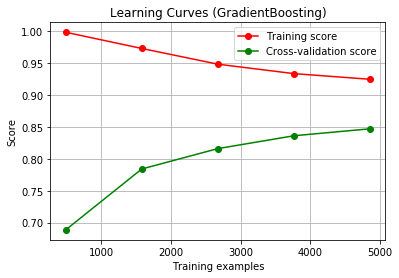

Training Score SVR:  0.29161019866765087
Test Score SVR :  0.2921859792559355
Training Score RandomForest:  0.9786647235237929
OOB Score RandomForest:  0.850482884682096


In [34]:
#Linear Regression

linreg=linear_model.LinearRegression()
linreg.fit(X_train,Y_train)
tab=[['Setting', 'Coefficient']] #list to see the values of the coefficients
col=list(train.columns.values)
for i in range(7):
    tab.append([col[i],linreg.coef_[i]])

print ("Linear Regression Training Score   : ", str(linreg.score(X_train,Y_train)))
print ("Linear Regression Test Score  : " , str(linreg.score(X_test,Y_test)))
print ("Linear Regression Co-efficient :")
print (tab)


#Gradient Boosting Regression


gbr = ensemble.GradientBoostingRegressor(n_estimators=2000)
gbr.fit(X_train,Y_train)
print ("Gradient Boosting Training Score : ", str(gbr.score(X_train,Y_train)))
print ("Gradient Boosting Test Score : " , str(gbr.score(X_test,Y_test)))

title = "Learning Curves (GradientBoosting)"
estimator = ensemble.GradientBoostingRegressor(n_estimators=2000)
plot_learning_curve(estimator, title, X_train, Y_train)
plt.show()


#Support Vector Regression

svr=svm.SVR(kernel='linear')
svr.fit(X_train,Y_train)
print ("Training Score SVR: ", str(svr.score(X_train,Y_train)))
print ("Test Score SVR : " , str(svr.score(X_test,Y_test)))


#Random Forest Regression


rf=ensemble.RandomForestRegressor(n_estimators=30,oob_score=True) #30 arbres et OOB Estimation
rf.fit(train,target)
print ("Training Score RandomForest: ", str(rf.score(train,target)))
print ("OOB Score RandomForest: " , str(rf.oob_score_))


In [35]:
#Improvements


#we are looking for the most influential parameter of our model
## For this we use two algorithms that we used:
## linear regressio and Random Forest
def param_import():
    col=list(train.columns.values)
    #To find the coefficients of linear regression
    index1=linreg.coef_.argsort()[-2:][-1] #returns the sorted list of coefs , element 1
    index2=linreg.coef_.argsort()[-2:][0] #returns the sorted list of coefs , element 2
    print('For improvements, we have calculated the most influential parameters')
    print('For linear regression, the most influential parameters are :', col[index1],' et ',col[index2])
    #we then find the coefficients of the RF
    index3=rf.feature_importances_.argsort()[-2:][-1] 
    index4=rf.feature_importances_.argsort()[-2:][0] 
    print('For the RF algorithm, the most influential parameters are :', col[index3],' et ',col[index4])
    #we then find the Gradient Boosting coefficients
    index5=gbr.feature_importances_.argsort()[-2:][-1]
    index6=gbr.feature_importances_.argsort()[-2:][0]
    print('For the Gradient Boosting algorithm, the most influential parameters are:', col[index5],' et ',col[index6])
    if index3==index5:
        plus_import=index3
    elif index5==index4:
        plus_import=index4
    return plus_import

print('The most important parameter is therefore: ', col[param_import()])


For improvements, we have calculated the most influential parameters
For linear regression, the most influential parameters are : month  et  hours
For the RF algorithm, the most influential parameters are : hours  et  temp
For the Gradient Boosting algorithm, the most influential parameters are: hours  et  temp
The most important parameter is therefore:  hours


In [36]:
## We are trying to prove that certain niches are most important for bicycle demand
evening = df[df['hours'].isin([17,18,19])]
peak_evening=evening[evening['workingday']==1]
morning = df[df['hours'].isin([7,8,9])]
peak_morning=morning[morning['workingday']==1]
weekend = df[df['hours'].isin([12,13,14,15,16])]
peak_weekend=weekend[weekend['workingday']==0]

print('Average number of bikes for different time slots  ')
print('The total average demand is: ', df['count'].mean())
print('Weekdays between 5 and 7 p.m. : ', peak_evening['count'].mean())
print('Weekdays between 7 and 9 a.m.: ', peak_morning['count'].mean())
print('During the weekend, between 12 and 4 p.m ', peak_weekend['count'].mean())

Average number of bikes for different time slots  
The total average demand is:  191.57413191254824
Weekdays between 5 and 7 p.m. :  457.9924973204716
Weekdays between 7 and 9 a.m.:  337.64301075268816
During the weekend, between 12 and 4 p.m  377.40275862068967
